## Integrantes
<ul>
<li>Sebastián Aranda 201104560-2</li>
<li>Felipe Santander 201104528-9</li>
</ul>

# Small circle inside large circle


In [1]:
import numpy as np
from sklearn.utils import check_random_state
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

##### Manifold

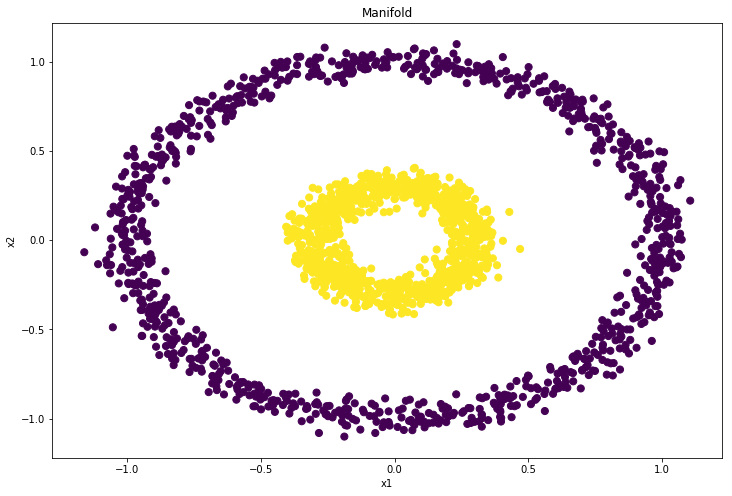

In [17]:
def do_circles(n=2000,noisy_n=0.05):
    generator = check_random_state(10)
    linspace = np.linspace(0, 2 * np.pi, n // 2 + 1)[:-1]
    outer_circ_x = np.cos(linspace)
    outer_circ_y = np.sin(linspace)
    inner_circ_x = outer_circ_x * .3
    inner_circ_y = outer_circ_y * .3
    X = np.vstack((np.append(outer_circ_x, inner_circ_x),
        np.append(outer_circ_y, inner_circ_y))).T
    y = np.hstack([np.zeros(n // 2, dtype=np.intp),
        np.ones(n // 2, dtype=np.intp)])
    X += generator.normal(scale=noisy_n, size=X.shape)
    X_train, X_test, y_train, y_test = train_test_split(X, y,
        test_size=0.5, random_state=42)
    return X_train,y_train,X_test,y_test

X_train, y_train, X_test, y_test = do_circles()
X = np.vstack((X_train,X_test))
y = np.hstack((y_train, y_test))

plt.figure(figsize=(12,8))
plt.scatter(X[:,0],X[:,1],s=50,c=y)
plt.title("Manifold")
plt.xlabel('x1')
plt.ylabel('x2')
plt.show()

In [ ]:
def plot_classifier(clf,X_train,Y_train,X_test,Y_test,model_type):
    f, axis = plt.subplots(1, 1, sharex='col', sharey='row',figsize=(12, 8))
    axis.scatter(X_train[:,0],X_train[:,1],s=30,c=Y_train,zorder=10,cmap='cool')
    axis.scatter(X_test[:,0],X_test[:,1],s=20,c=Y_test,zorder=10,cmap='Greys')
    XX, YY = np.mgrid[-2:2:200j, -2:2:200j]
    if model_type == 'tree':
        Z = clf.predict_proba(np.c_[XX.ravel(), YY.ravel()])[:,0]
    elif model_type == 'ann':
        Z = clf.predict(np.c_[XX.ravel(), YY.ravel()])
    else: raise ValueError('model type not supported')
    Z = Z.reshape(XX.shape)
    Zplot = Z >= 0.5
    axis.pcolormesh(XX, YY, Zplot ,cmap='YlGn')
    axis.contour(XX, YY, Z, alpha=1, colors=["k", "k", "k"], linestyles=["--", "-", "--"],levels=[-2, 0, 2])
    plt.show()

X_train, y_train, X_test, y_test = do_circles()
X = np.vstack((X_train,X_test))
y = np.hstack((y_train, y_test))

plot_classifier()

##### Red con una neurona

In [18]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD

Using TensorFlow backend.


In [ ]:
n_h=1
model = Sequential()
model.add(Dense(1, input_dim=X_train.shape[1], kernel_initializer='uniform', activation='relu'))
model.add(Dense(n_h, init='uniform', activation='sigmoid'))
model.compile(optimizer=SGD(lr=1), loss='binary_crossentropy', metrics=['accuracy'])
model.fit(X_train, Y_train, epochs=50, batch_size=100, verbose=1)
scores = model.evaluate(X_test, Y_test)
test_acc = scores[1]

##### Red con 1 capa escondida

In [ ]:
n_h=32
model = Sequential()
model.add(Dense(n_h, input_dim=X_train.shape[1], kernel_initializer='uniform', activation='relu'))
model.add(Dense(1, kernel_initializer='uniform', activation='sigmoid'))
model.compile(optimizer=SGD(lr=1), loss='binary_crossentropy', metrics=['accuracy'])
model.fit(X_train, Y_train, epochs=50, batch_size=100, verbose=1)
scores = model.evaluate(X_test, Y_test)
test_acc = scores[1]

##### Árbol Stump (1 Nivel)

In [ ]:
from sklearn.tree import DecisionTreeClassifier as Tree
clf=Tree(criterion='gini',splitter='best',random_state=0,max_depth=1)
clf.fit(X_train,Y_train)
acc_test = clf.score(X_test,Y_test)
print "Test Accuracy = %f"%acc_test
print clf.tree_.max_depth
plot_classifier(clf,X_train,Y_train,X_test,Y_test,'tree')

##### Árbol de varios niveles

In [ ]:
n_t=8
clf=Tree(criterion='gini',splitter='best',random_state=0,max_depth=n_t)
clf.fit(X_train,Y_train)
acc_test = clf.score(X_test,Y_test)
print "Test Accuracy = %f"%acc_test
print clf.tree_.max_depth
plot_classifier(clf,X_train,Y_train,X_test,Y_test,'tree')

### PCA con Kernel Gaussiano

In [ ]:
kpca = KernelPCA(n_components=2,kernel="rbf", gamma=5)
kpca = kpca.fit(X_train)
Xkpca_train = kpca.transform(X_train)
Xkpca_test = kpca.transform(X_test)

##### Red neuronal con 1 neuroa

##### Regresión Logística

##### Árbol de clasificación de 1 nivel